<a href="https://colab.research.google.com/github/AyakaSenpai/Syaeful-Ardhi_231011401249/blob/main/dataset_minuman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("Wholesale customers data.csv")

In [3]:
X = df.drop(['Channel', 'Region'], axis=1)
y = df['Channel']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [13]:
y_pred = model.predict(X_test_scaled)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Confusion Matrix ===
[[86  3]
 [ 5 38]]

=== Classification Report ===
              precision    recall  f1-score   support

           1       0.95      0.97      0.96        89
           2       0.93      0.88      0.90        43

    accuracy                           0.94       132
   macro avg       0.94      0.93      0.93       132
weighted avg       0.94      0.94      0.94       132



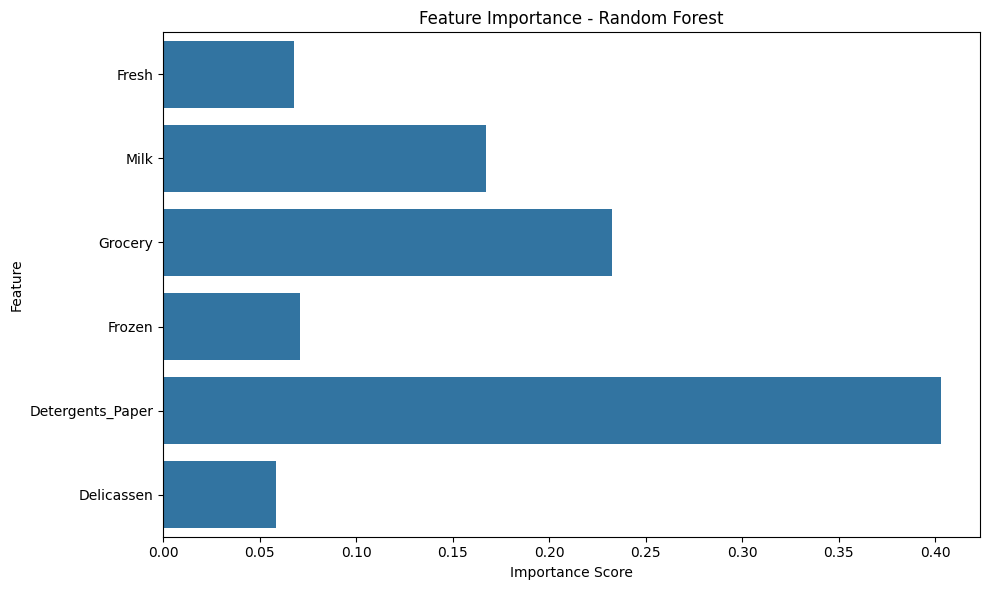

In [15]:
importances = model.feature_importances_
feature_names = X.columns


plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()